1.Import

In [4]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.patches as patches

2.Read Complete Img

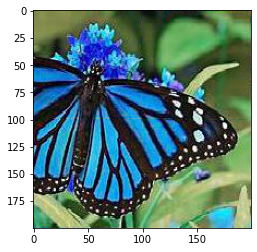

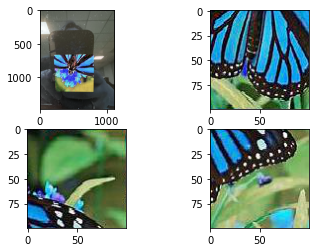

In [5]:
img1 = cv.imread('img/ans.png')          # queryImage
plt.imshow(img1),plt.show()

grid=220
for part in range(1,5):
    img2 = cv.imread('img/image{0}.png'.format(part)) # trainImage
    grid+=1
    plt.subplot(grid)
    plt.imshow(img2)
plt.show()

3. Matching partial img with complete img and detect position

Match point sum:[27, 1, 3, 2, 0]; Prediect Area:0


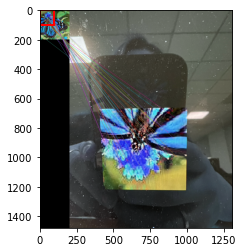

Match point sum:[3, 0, 108, 3, 0]; Prediect Area:2


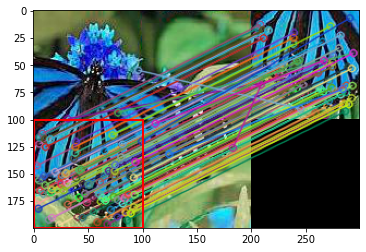

Match point sum:[3, 52, 2, 3, 0]; Prediect Area:1


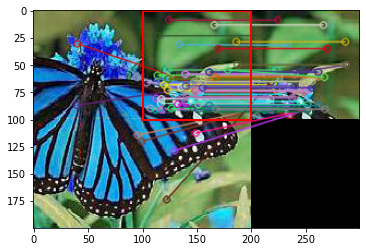

Match point sum:[0, 2, 6, 114, 0]; Prediect Area:3


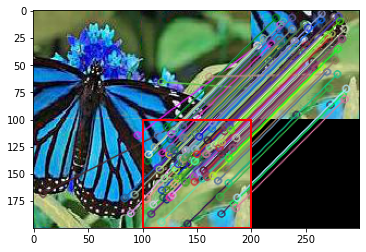

In [6]:
for part in range(1,5):
    
    img2 = cv.imread('img/image{0}.png'.format(part)) # trainImage
	# Initiate SIFT detector
    sift = cv.SIFT_create()
	# find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(img1,None)
    kp2, des2 = sift.detectAndCompute(img2,None)
	# BFMatcher with default params
    bf = cv.BFMatcher()
    matches = bf.knnMatch(des1,des2,k=2)
	# Apply ratio test
    good = []
    area=[0,0,0,0,0]
    
    for m,n in matches:
        if m.distance < 0.75*n.distance:
            good.append([m])
            point=kp1[m.queryIdx].pt
            if(point[0]<=100 and point[1]<=100):
                area[0]+=1
            elif(point[0]>100 and point[1]<=100):
                area[1]+=1
            elif(point[0]<=100 and point[1]>100):
                area[2]+=1
            elif(point[0]>100 and point[1]>100):
                area[3]+=1
            else:
                area[4]+=1
	# cv.drawMatchesKnn expects list of lists as matches.
    img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    areaCode=area.index(max(area))
    print('Match point sum:{0}; Prediect Area:{1}'.format(area,areaCode))
    if(areaCode==0):
        rectXY=(0,0)
    elif(areaCode==1):
        rectXY=(100,0)
    elif(areaCode==2):
        rectXY=(0,100)
    else:
        rectXY=(100,100)
    
    # Create figure and axes
    fig, ax = plt.subplots()
    rect = patches.Rectangle(rectXY, 100, 100, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    plt.imshow(img3),plt.show()
